CoverType: Forest Cover Type Prediction
In this dataset, you are asked to predict the forest cover type (the predominant kind of tree cover) from strictly cartographic variables (as opposed to remotely sensed data). The actual forest cover type for a given 30 x 30 meter cell was determined from US Forest Service (USFS) Region 2 Resource Information System data. Independent variables were then derived from data obtained from the US Geological Survey and USFS. The data is in raw form (not scaled) and contains binary columns of data for qualitative independent variables such as wilderness areas and soil type.

This study area includes four wilderness areas located in the Roosevelt National Forest of northern Colorado. These areas represent forests with minimal human-caused disturbances, so that existing forest cover types are more a result of ecological processes rather than forest management practices.

The training set (58101 observations) contains both features and the Cover_Type. The test set contains only the features. You must predict the Cover_Type for every row in the test set (3500 observations). This is a subset of the original dataset created for this project. Please note that the training set is very imbalanced and some classes have only few hundred samples.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#to ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [3]:
data = pd.read_csv("covtype_train.csv")

In [4]:
data.head()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
0,3351,206,27,726,124,3813,192,252,180,2271,...,0,0,0,0,0,0,1,0,0,1
1,2732,129,7,212,1,1082,231,236,137,912,...,0,0,0,0,0,0,0,0,0,2
2,2572,24,9,201,25,957,216,222,142,2191,...,0,0,0,0,0,0,0,0,0,2
3,2824,69,13,417,39,3223,233,214,110,6478,...,0,0,0,0,0,0,0,0,0,2
4,2529,84,5,120,9,1092,227,231,139,4983,...,0,0,0,0,0,0,0,0,0,2


In [5]:
data.tail()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
58096,3160,315,8,0,0,1366,199,234,174,1129,...,0,0,0,0,0,0,0,0,0,1
58097,2607,45,12,242,52,977,223,214,123,1342,...,0,0,0,0,0,0,0,0,0,2
58098,2317,280,25,190,64,433,144,233,225,582,...,0,0,0,0,0,0,0,0,0,3
58099,3183,89,17,60,8,3443,243,211,91,443,...,0,0,0,0,0,0,0,0,0,1
58100,3177,171,22,108,39,722,229,244,135,2444,...,0,0,0,0,0,0,0,0,0,2


In [6]:
data.nunique()

Elevation                             1734
Aspect                                 361
Slope                                   57
Horizontal_Distance_To_Hydrology       460
Vertical_Distance_To_Hydrology         548
Horizontal_Distance_To_Roadways       5152
Hillshade_9am                          190
Hillshade_Noon                         154
Hillshade_3pm                          252
Horizontal_Distance_To_Fire_Points    4927
Wilderness_Area1                         2
Wilderness_Area2                         2
Wilderness_Area3                         2
Wilderness_Area4                         2
Soil_Type1                               2
Soil_Type2                               2
Soil_Type3                               2
Soil_Type4                               2
Soil_Type5                               2
Soil_Type6                               2
Soil_Type7                               2
Soil_Type8                               2
Soil_Type9                               2
Soil_Type10

There are 7 cover types
40 soil types 
4 wilderness areas

Other features:
Elevation                             
Aspect                                
Slope                                   
Horizontal_Distance_To_Hydrology       
Vertical_Distance_To_Hydrology         
Horizontal_Distance_To_Roadways      
Hillshade_9am                         
Hillshade_Noon                         
Hillshade_3pm                          
Horizontal_Distance_To_Fire_Points  

In [7]:
data.isnull()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58096,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
58097,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
58098,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
58099,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [8]:
data.value_counts(['Cover_Type']).sort_index()

Cover_Type
1             21297
2             28248
3              3607
4               259
5               932
6              1706
7              2052
dtype: int64

In [25]:
def EDA(X: pd.DataFrame) -> None:
    

    
    # Plot features distribution
    fig, ((ax0, ax1), (ax2, ax3), (ax4, ax5), (ax6,ax7), (ax8, ax9)) = plt.subplots(5, 2, figsize=(30, 20))
    axs = [ax0, ax1, ax2, ax3, ax4, ax5, ax6,ax7, ax8, ax9]
    for feature, ax in zip(X.columns[1:11], axs):
        x = X[feature].to_numpy()
        ax.hist(x, bins=50)
        ax.set_title(feature)
    plt.show()
        
    # Plot classes Distribution
    labels, counts = np.unique(X['Cover_Type'].to_numpy(), return_counts=True)
    plt.bar(labels, counts)
    plt.title('Classes distribution')
    plt.plot()
    
    # Look for features without variance
    stats = pd.DataFrame(X.describe())
    print(f"Features without variance: {[col for col in stats.columns if stats._get_value('std', col) == 0]}")

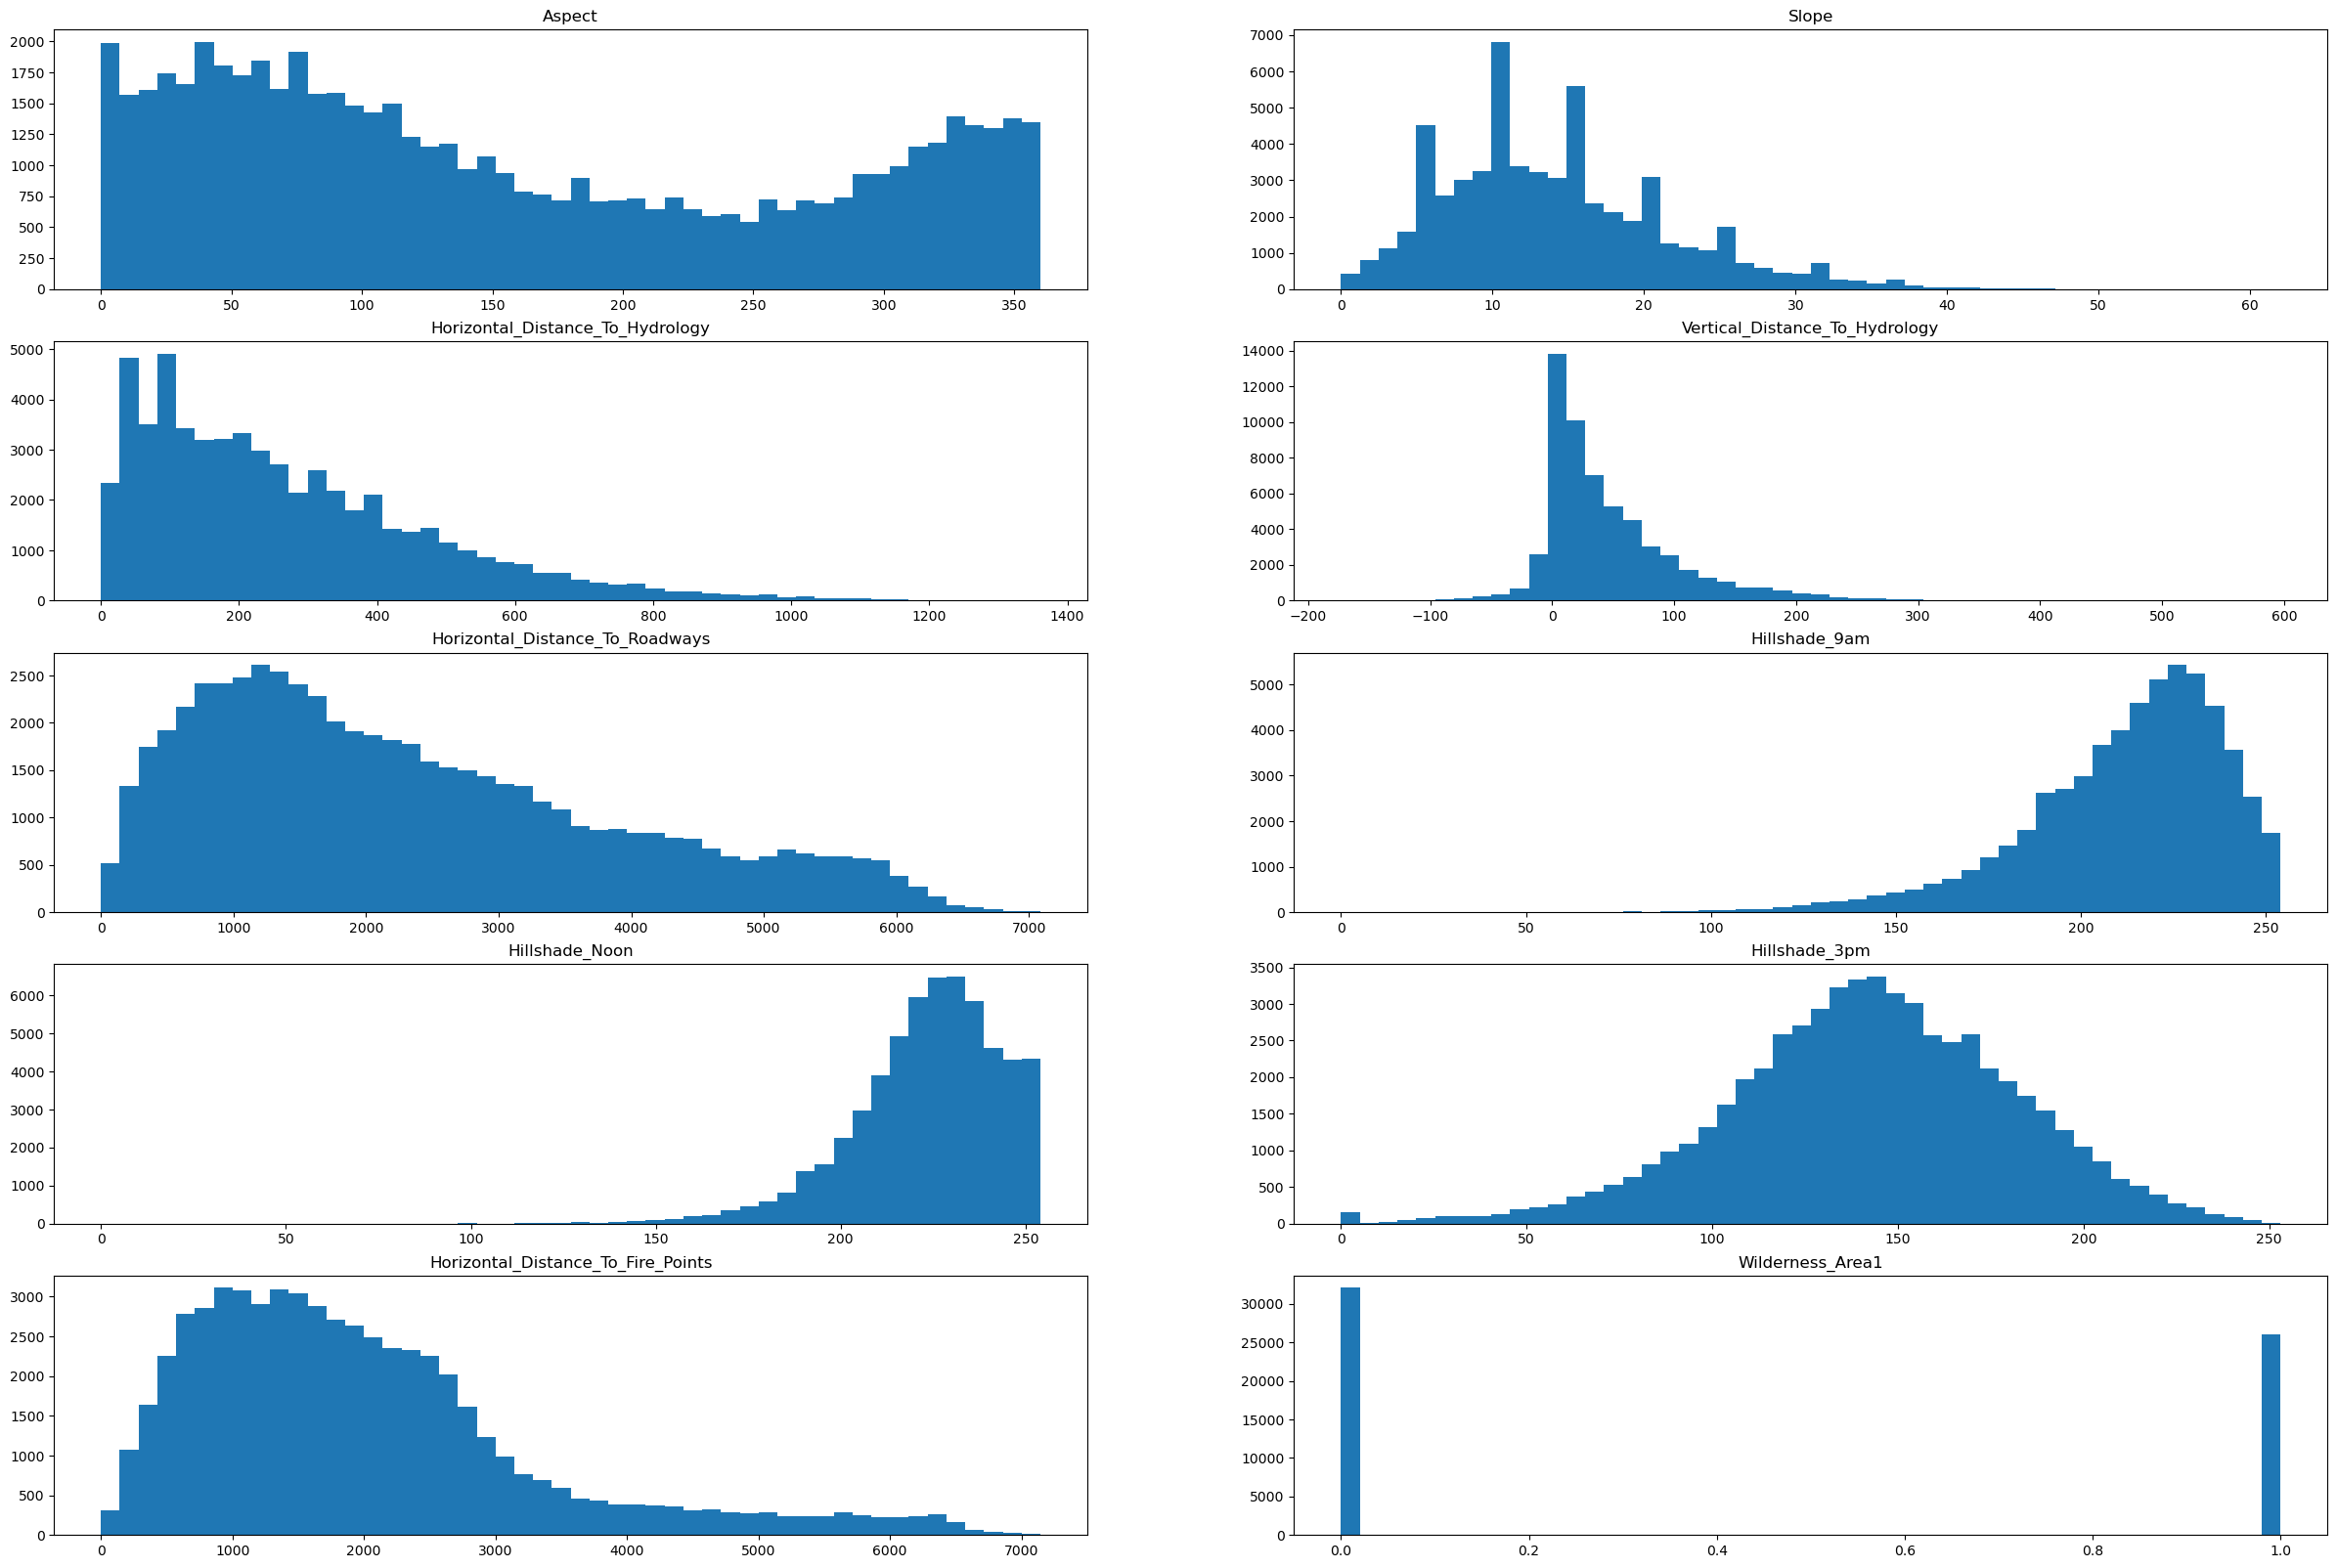

Features without variance: ['Soil_Type15']


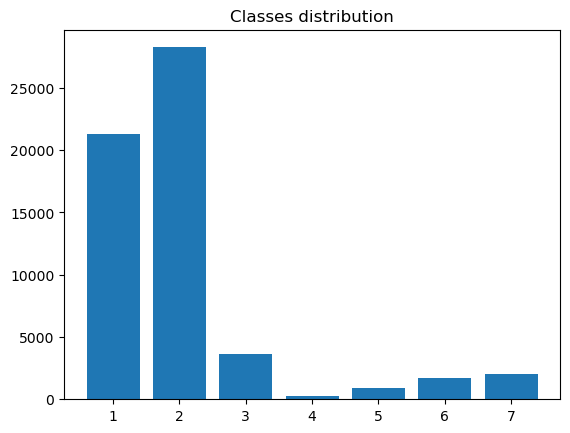

In [23]:
EDA(data)

In [12]:
#Correlation

data.corr()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
Elevation,1.000000,0.010435,-0.238112,0.306721,0.095186,0.362678,0.109985,0.197872,0.056291,0.144964,...,0.169584,0.070383,0.008643,0.082416,0.017540,0.035369,0.217175,0.193352,0.217102,-0.268264
Aspect,0.010435,1.000000,0.075075,0.016237,0.062913,0.024600,-0.581089,0.336685,0.645140,-0.108300,...,0.065950,0.023431,0.011937,-0.023084,0.001487,-0.022186,0.023408,0.001592,-0.016498,0.016260
Slope,-0.238112,0.075075,1.000000,-0.013878,0.271948,-0.211136,-0.318395,-0.525222,-0.180978,-0.183720,...,-0.134401,0.210039,-0.013592,-0.021101,0.002766,0.007228,-0.069904,0.093695,0.022523,0.145731
Horizontal_Distance_To_Hydrology,0.306721,0.016237,-0.013878,1.000000,0.601254,0.071890,-0.024807,0.045053,0.049917,0.051798,...,0.129254,0.095704,0.068458,-0.003746,0.030842,-0.008300,0.037745,0.031262,0.148339,-0.024854
Vertical_Distance_To_Hydrology,0.095186,0.062913,0.271948,0.601254,1.000000,-0.042477,-0.160286,-0.111975,0.029529,-0.069990,...,0.040071,0.160410,0.054933,-0.007700,0.009484,-0.008029,-0.009375,0.048556,0.179741,0.076705
Horizontal_Distance_To_Roadways,0.362678,0.024600,-0.211136,0.071890,-0.042477,1.000000,0.033537,0.183663,0.102469,0.332752,...,-0.086498,-0.078575,0.003189,0.001444,0.006225,0.016748,0.077970,0.034564,0.017017,-0.155258
Hillshade_9am,0.109985,-0.581089,-0.318395,-0.024807,-0.160286,0.033537,1.000000,-0.001632,-0.783177,0.129455,...,0.000136,-0.067740,0.005993,0.026325,0.007372,0.009778,0.011670,-0.019896,0.003380,-0.029857
Hillshade_Noon,0.197872,0.336685,-0.525222,0.045053,-0.111975,0.183663,-0.001632,1.000000,0.598603,0.054471,...,0.130721,-0.083801,0.040754,0.004517,0.012730,-0.023532,0.043247,-0.079321,-0.040669,-0.094159
Hillshade_3pm,0.056291,0.645140,-0.180978,0.049917,0.029529,0.102469,-0.783177,0.598603,1.000000,-0.046764,...,0.090694,-0.020674,0.017702,-0.015859,-0.000068,-0.021933,0.024925,-0.040065,-0.026354,-0.050833
Horizontal_Distance_To_Fire_Points,0.144964,-0.108300,-0.183720,0.051798,-0.069990,0.332752,0.129455,0.054471,-0.046764,1.000000,...,-0.090765,-0.058325,-0.031171,0.003190,-0.008474,0.004007,-0.027074,-0.002480,0.009674,-0.109868


<Axes: >

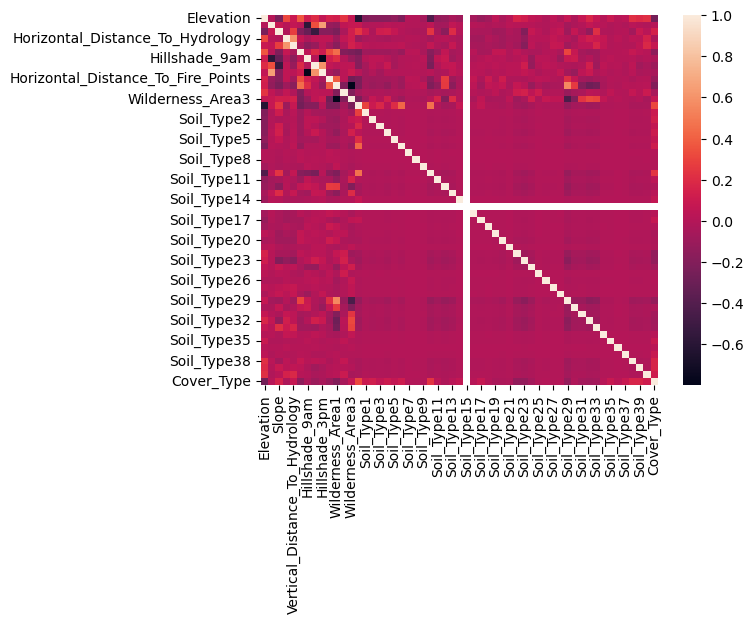

In [13]:
#Correlation plot

sns.heatmap(data.corr())

In [21]:
data.drop(columns=['Soil_Type15'])

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
0,3351,206,27,726,124,3813,192,252,180,2271,...,0,0,0,0,0,0,1,0,0,1
1,2732,129,7,212,1,1082,231,236,137,912,...,0,0,0,0,0,0,0,0,0,2
2,2572,24,9,201,25,957,216,222,142,2191,...,0,0,0,0,0,0,0,0,0,2
3,2824,69,13,417,39,3223,233,214,110,6478,...,0,0,0,0,0,0,0,0,0,2
4,2529,84,5,120,9,1092,227,231,139,4983,...,0,0,0,0,0,0,0,0,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58096,3160,315,8,0,0,1366,199,234,174,1129,...,0,0,0,0,0,0,0,0,0,1
58097,2607,45,12,242,52,977,223,214,123,1342,...,0,0,0,0,0,0,0,0,0,2
58098,2317,280,25,190,64,433,144,233,225,582,...,0,0,0,0,0,0,0,0,0,3
58099,3183,89,17,60,8,3443,243,211,91,443,...,0,0,0,0,0,0,0,0,0,1


In [14]:
data.value_counts(['Cover_Type']).sort_index()

Cover_Type
1             21297
2             28248
3              3607
4               259
5               932
6              1706
7              2052
dtype: int64

In [26]:
x, y = data.drop("Cover_Type", axis=1), data["Cover_Type"]

In [27]:
from sklearn.model_selection import train_test_split

In [28]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.1, random_state=23)

In [ ]:
from imblearn.over_sampling import SMOTE
from collections import Counter
counter = Counter(ytrain)
#print('Before', counter)

smt = SMOTE()
xtrain, ytrain = smt.fit_resample(xtrain, ytrain)
counter = Counter(ytrain)

In [29]:
categoricals = []
numericals = []
for col in x.columns:
    if col[:9]=="Soil_Type" or col[:15]=='Wilderness_Area':
        categoricals.append(col)
    else:
        numericals.append(col)

In [30]:
from sklearn.preprocessing import RobustScaler
ss = RobustScaler()

In [32]:
xtrain.tail()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type31,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40
9704,2988,3,15,319,69,691,198,210,148,1668,...,0,0,0,0,0,0,0,0,0,0
11190,3172,18,15,153,18,3182,207,207,134,853,...,0,1,0,0,0,0,0,0,0,0
26569,2922,144,7,30,0,1885,230,239,142,470,...,0,1,0,0,0,0,0,0,0,0
9256,3014,88,20,124,22,3237,245,204,80,860,...,0,0,1,0,0,0,0,0,0,0
41555,2473,23,27,162,82,598,193,172,103,1110,...,0,0,0,0,0,0,0,0,0,0


In [33]:
xtrain[numericals] = ss.fit_transform(xtrain[numericals])
xtest[numericals] = ss.transform(xtest[numericals])

In [34]:
xtrain.head()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type31,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40
25051,-0.570225,1.074257,1.111111,0.329710,1.557377,-0.244165,-1.484848,-1.166667,0.42,-0.157413,...,0,0,0,0,0,0,0,0,0,0
47434,-0.216292,-0.371287,-0.555556,0.572464,-0.163934,1.198384,0.212121,-0.166667,-0.24,1.930764,...,0,0,0,0,0,0,0,0,0,0
53913,0.890449,0.717822,1.333333,1.166667,2.918033,-0.682675,-2.151515,0.500000,1.66,-0.530372,...,0,0,0,0,0,0,0,0,0,0
7470,-1.609551,-0.034653,2.444444,0.137681,2.000000,-0.367145,1.090909,-1.583333,-2.26,-0.618550,...,0,0,0,0,0,0,0,0,0,0
30647,0.556180,0.024752,-0.222222,0.768116,0.803279,0.170557,0.606061,0.333333,-0.38,0.716525,...,0,0,1,0,0,0,0,0,0,0


In [35]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(random_state=12)
tree.fit(xtrain, ytrain)

DecisionTreeClassifier(random_state=12)

In [36]:
from sklearn.metrics import classification_report

In [37]:
y_pred_tr = tree.predict(xtrain)
y_pred_ts = tree.predict(xtest)

In [38]:
print("Training Results:\n")
print(classification_report(ytrain, y_pred_tr))
print("\nTesting Results:\n")
print(classification_report(ytest, y_pred_ts))

Training Results:

              precision    recall  f1-score   support

           1       1.00      1.00      1.00     19088
           2       1.00      1.00      1.00     25470
           3       1.00      1.00      1.00      3242
           4       1.00      1.00      1.00       237
           5       1.00      1.00      1.00       849
           6       1.00      1.00      1.00      1530
           7       1.00      1.00      1.00      1874

    accuracy                           1.00     52290
   macro avg       1.00      1.00      1.00     52290
weighted avg       1.00      1.00      1.00     52290


Testing Results:

              precision    recall  f1-score   support

           1       0.84      0.82      0.83      2209
           2       0.85      0.86      0.86      2778
           3       0.83      0.84      0.84       365
           4       0.75      0.82      0.78        22
           5       0.57      0.60      0.59        83
           6       0.70      0.68      0

In [39]:
from sklearn.model_selection import cross_val_score

In [40]:
cvscore = cross_val_score(tree, xtrain, ytrain, cv=10, scoring='accuracy')

In [41]:
cvscore

array([0.83495888, 0.81870338, 0.83495888, 0.82329317, 0.82424938,
       0.82329317, 0.82558807, 0.8313253 , 0.82539683, 0.8238669 ])

In [42]:
cvscore.mean()

0.8265633964429145

In [43]:
cvscore.std()

0.005116156640164471

In [44]:
from sklearn.model_selection import StratifiedKFold


In [45]:
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=15)


In [46]:
cvscore = cross_val_score(tree, xtrain, ytrain, cv=skf, scoring='accuracy')

In [47]:
cvscore

array([0.83266399, 0.82080704, 0.82501434, 0.8303691 , 0.84241729,
       0.82367566, 0.82654427, 0.81640849, 0.83553261, 0.81812966])

In [48]:
cvscore.mean()

0.8271562440237139

In [49]:
cvscore.std()

0.007733712864333349

<Axes: ylabel='count'>

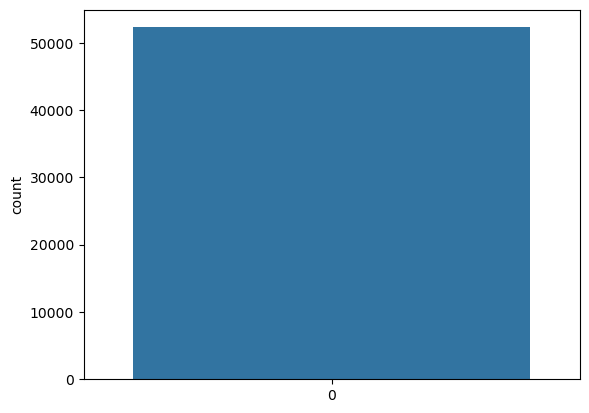

In [50]:
sns.countplot(ytrain)

In [15]:
X_num_train = data.loc[:, ['Elevation', 'Aspect', 'Slope', 'Horizontal_Distance_To_Hydrology',
                   'Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways',
                   'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm', 'Horizontal_Distance_To_Fire_Points']].values
X_cat_train = data.loc[:, ['Wilderness_Area1', 'Wilderness_Area2', 'Wilderness_Area3', 
                      'Wilderness_Area4', 'Soil_Type1', 'Soil_Type2', 'Soil_Type3', 'Soil_Type4', 
                      'Soil_Type5', 'Soil_Type6', 'Soil_Type7', 'Soil_Type8', 'Soil_Type9', 
                      'Soil_Type10', 'Soil_Type11', 'Soil_Type12', 'Soil_Type13', 'Soil_Type14', 
                      'Soil_Type15', 'Soil_Type16', 'Soil_Type17', 'Soil_Type18', 'Soil_Type19', 
                      'Soil_Type20', 'Soil_Type21', 'Soil_Type22', 'Soil_Type23', 'Soil_Type24',
                      'Soil_Type25', 'Soil_Type26', 'Soil_Type27', 'Soil_Type28', 'Soil_Type29',
                      'Soil_Type30', 'Soil_Type31', 'Soil_Type32', 'Soil_Type33', 'Soil_Type34',
                      'Soil_Type35', 'Soil_Type36', 'Soil_Type37', 'Soil_Type38', 'Soil_Type39',
                      'Soil_Type40',]].values
y = data.loc[:, 'Cover_Type'].values

print('Numerical Feature Array Shape:   ', X_num_train.shape)
print('Categorical Feature Array Shape: ', X_cat_train.shape)
print('Label Array Shape:               ', y.shape)

Numerical Feature Array Shape:    (58101, 10)
Categorical Feature Array Shape:  (58101, 44)
Label Array Shape:                (58101,)


In [16]:
# join arrays
X = np.hstack((X_num_train, X_cat_train))

print('Feature Array Shape:', X.shape)

Feature Array Shape: (58101, 54)


In [17]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(random_state=12)
tree.fit(X, y)

DecisionTreeClassifier(random_state=12)

In [18]:
from sklearn.metrics import classification_report

In [19]:
y_pred_tr = tree.predict(X)
y_pred_ts = tree.predict(xtest)

NameError: name 'xtrain' is not defined

In [17]:
testdata = pd.read_csv("covtype_test.csv")

In [18]:
testdata.head()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type31,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40
0,3247,339,12,525,39,570,193,222,168,1618,...,0,0,0,0,0,0,0,0,0,0
1,3065,186,19,85,7,1570,220,250,155,2315,...,0,0,1,0,0,0,0,0,0,0
2,3169,84,21,190,22,3004,244,199,74,2064,...,1,0,0,0,0,0,0,0,0,0
3,2893,294,29,175,89,5019,127,218,225,4763,...,0,0,0,0,0,0,0,0,0,0
4,2825,81,19,85,20,108,242,202,82,134,...,0,0,0,0,0,0,0,0,0,0


In [19]:
testdata.tail()


,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type31,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40
3495,3432,172,14,480,232,2471,228,246,146,721,...,0,0,0,0,0,0,0,1,0,0
3496,3358,218,6,30,-1,4611,214,246,168,4251,...,0,0,0,0,0,0,0,0,0,0
3497,3431,184,12,458,106,4201,223,248,156,3102,...,0,0,1,0,0,0,0,0,0,0
3498,3378,331,36,255,121,960,114,170,181,1517,...,0,0,0,0,0,0,0,0,1,0
3499,3701,331,5,1112,255,5423,208,234,164,3694,...,0,0,0,0,0,0,0,0,0,1


In [20]:
testdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3500 entries, 0 to 3499
Data columns (total 54 columns):
 #   Column                              Non-Null Count  Dtype
---  ------                              --------------  -----
 0   Elevation                           3500 non-null   int64
 1   Aspect                              3500 non-null   int64
 2   Slope                               3500 non-null   int64
 3   Horizontal_Distance_To_Hydrology    3500 non-null   int64
 4   Vertical_Distance_To_Hydrology      3500 non-null   int64
 5   Horizontal_Distance_To_Roadways     3500 non-null   int64
 6   Hillshade_9am                       3500 non-null   int64
 7   Hillshade_Noon                      3500 non-null   int64
 8   Hillshade_3pm                       3500 non-null   int64
 9   Horizontal_Distance_To_Fire_Points  3500 non-null   int64
 10  Wilderness_Area1                    3500 non-null   int64
 11  Wilderness_Area2                    3500 non-null   int64
 12  Wilder

In [21]:
testdata.nunique()

Elevation                             1357
Aspect                                 359
Slope                                   49
Horizontal_Distance_To_Hydrology       268
Vertical_Distance_To_Hydrology         323
Horizontal_Distance_To_Roadways       1661
Hillshade_9am                          156
Hillshade_Noon                         120
Hillshade_3pm                          239
Horizontal_Distance_To_Fire_Points    1531
Wilderness_Area1                         2
Wilderness_Area2                         2
Wilderness_Area3                         2
Wilderness_Area4                         2
Soil_Type1                               2
Soil_Type2                               2
Soil_Type3                               2
Soil_Type4                               2
Soil_Type5                               2
Soil_Type6                               2
Soil_Type7                               1
Soil_Type8                               1
Soil_Type9                               1
Soil_Type10

In [22]:
testdata.shape

(3500, 54)

In [23]:
data.shape

(58101, 55)

<Axes: >

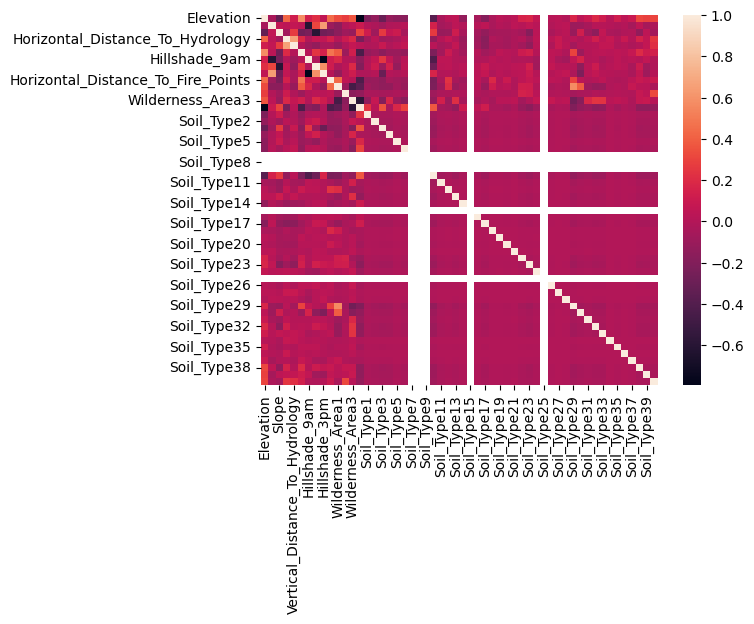

In [24]:
sns.heatmap(testdata.corr())

In [26]:
!pip install tabpfn

In [27]:
import numpy as np
from pathlib import Path
import pandas as pd
import time

import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

from sklearn.metrics import accuracy_score
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from tabpfn.scripts.decision_boundary import DecisionBoundaryDisplay

from tabpfn import TabPFNClassifier

In [28]:
# N_ensemble_configurations defines how many estimators are averaged, it is bounded by #features * #classes
# more ensemble members are slower, but more accurate
classifier = TabPFNClassifier(device='cuda', N_ensemble_configurations=4)

We have to download the TabPFN, as there is no checkpoint at  /Users/Irem/anaconda3/lib/python3.11/site-packages/tabpfn/models_diff/prior_diff_real_checkpoint_n_0_epoch_100.cpkt
It has about 100MB, so this might take a moment.
Loading model that can be used for inference only
Using a Transformer with 25.82 M parameters


In [31]:
X = data.drop('Cover_Type', axis='columns')
y = data['Cover_Type']
X_train_l, X_test, y_train_l, y_test = train_test_split(X, y, test_size=0.25, random_state=73)
X_train, X_val, y_train, y_val = train_test_split(X_train_l, y_train_l, test_size=0.2, random_state=42)

In [32]:
start = time.time()
classifier.fit(X_train, y_train)
y_eval, p_eval = classifier.predict(X_test, return_winning_probability=True)
print('Prediction time: ', time.time() - start, 'Accuracy', accuracy_score(y_test, y_eval))

ValueError: ⚠️ WARNING: TabPFN is not made for datasets with a trainingsize > 1024. Prediction might take a while, be less reliable. We advise not to run datasets > 10k samples, which might lead to your machine crashing (due to quadratic memory scaling of TabPFN). Please confirm you want to run by passing overwrite_warning=True to the fit function.